<a href="https://colab.research.google.com/github/evgeny-kolonsky/bacteria/blob/main/Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building graph of bacteria's metabolism

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/bacteria/main/chains.txt'
df = pd.read_csv(url, delimiter='\t') 

In [5]:
df

,input,output,name,C0,C1,C3,Fe1,Fe2,S0,S1,S2,S3,Anode
0,Ammonia,Nitrate,Prosthecobacter,0.476012,0.000000,0.990261,0.000000,0.332974,0.000000,0.000000,0.000000,0.000000,0.000000
1,Ammonia,"Nitrite, nitrate",Leptolinea,0.000000,0.000000,0.000000,0.000000,0.000000,0.490568,1.101763,1.838523,2.026113,1.274164
2,"Ammonium, nitrate, organic matter","Nitrite, nitrate, N2O, CO2, CH4, H2, NH3",Comamonadaceae,0.000000,0.000000,0.000000,0.000000,0.000000,1.521495,0.000000,0.000000,0.000000,0.000000
3,"Ammonium, nitrate, organic matter","Nitrite, nitrate, N2O, CO2, CH4, H2, NH3",Comamonadaceae,0.000000,0.590874,0.696680,0.000000,0.177076,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Ammonium, nitrate, organic matter","Nitrite, nitrate, N2O, CO2, CH4, H2, NH3",Comamonadaceae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230434,0.274302,0.000000,0.649508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Sulfur compounds,"Sulfuric acid, organic compounds",Thiobacillus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.261351,3.420883,2.462630,1.526765
176,Sulfur compounds,"Sulfuric acid, organic compounds",Thiobacillus,0.000000,0.000000,0.000000,0.000000,0.000000,0.800573,0.000000,0.000000,0.000000,0.000000
177,Sulfur compounds,"Sulfuric acid, organic compounds",Thiobacillus,0.000000,0.000000,0.097507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
178,"Sulfur, Iron","Sulfate, Iron Oxides",Sideroxydans,0.000000,0.000000,0.000000,1.825844,1.810990,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
G = nx.MultiDiGraph()
edge_labels = {}
for index, row in df.iterrows():
  if row.C0 !=0:
    name = row['name']
    inputs = str(row.input).upper().replace(' ', '').split(',')
    outputs = str(row.output).upper().replace(' ', '').split(',')
    w = row.C0
    for node_in in inputs:
      for node_out in outputs:
        G.add_edge(node_in, node_out, weight=w)
        edge_labels[(node_in, node_out)] = name



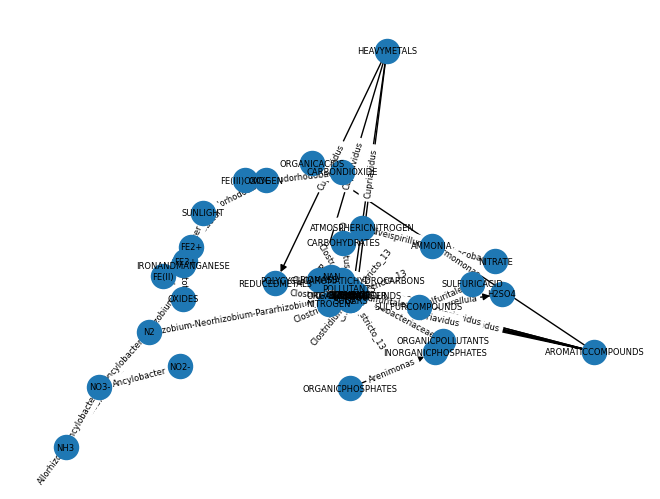

In [7]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_size=6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.show()

In [8]:
for node in G.nodes():
  print(node)

AMMONIA
NITRATE
AROMATICCOMPOUNDS
CO2
H2O
BIOMASS
ORGANICACIDS
REDUCEDMETALS
HEAVYMETALS
ATMOSPHERICNITROGEN
CARBOHYDRATES
ACETATE
H2
CARBONDIOXIDE
OXYGEN
SUNLIGHT
SUGARS
O2
FE(III)OXIDE
FE(II)
FE2+
FE3+
IRONANDMANGANESE
OXIDES
N2
NH3
NITROGEN
NAN
NO3-
NO2-
ORGANICCOMPOUNDS
ORGANICMATTER
BUTYRATE
LACTATE
ETHANOL
CELLULOSE
XYLAN
ORGANICPHOSPHATES
INORGANICPHOSPHATES
ORGANICPOLLUTANTS
POLLUTANTS
POLYCYCLICAROMATICHYDROCARBONS
SULFURCOMPOUNDS
H2SO4
SULFURICACID


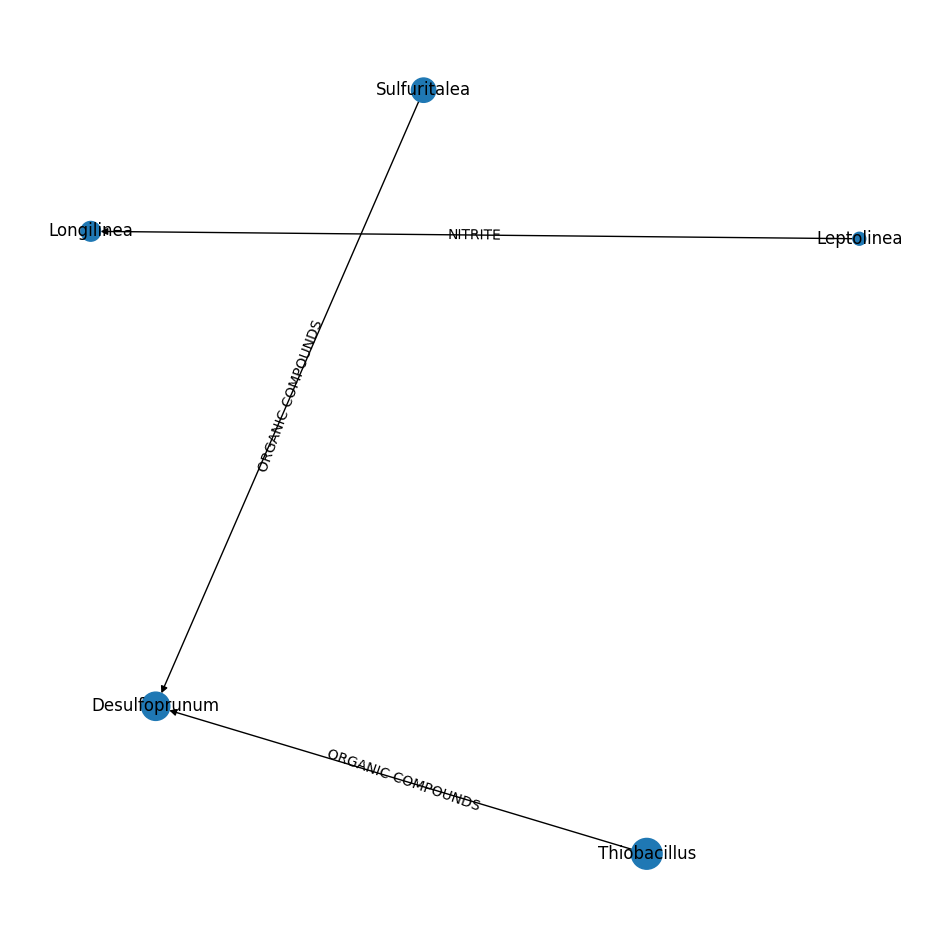

In [9]:
plt.subplots(figsize=(12, 12))

B = nx.MultiDiGraph()
otbor = 'S1'
percentile =50 # get top  by weight
min_w = np.percentile(df[otbor][df[otbor]>0].to_numpy(), percentile)
producers = {}
customers = {}
edge_labels = {}
for index, row in df.iterrows():
  weight = row[otbor]
  bakteria = row['name']
  if weight > min_w:
    for material in str(row.input).upper().strip().split(','):
      if customers.get(bakteria):
        customers[bakteria].append(material)
      else:
        customers[bakteria] = [material]
    for material in str(row.output).upper().strip().split(','):
      if producers.get(bakteria):
        producers[bakteria].append(material)
      else:
        producers[bakteria] = [material]

    B.add_node(bakteria, weight=weight)

for c in customers.keys():
  for p in producers.keys():
    mats_consumed = customers[c] 
    mats_produced = producers[p]
    mats_common = set.intersection(set(mats_consumed), set(mats_produced))
    if mats_common and c != p:
      #print(p, c, mats_common)
      B.add_edge(p, c)
      edge_labels[(p, c)] = ",".join(mats_common)


B.remove_nodes_from(list(nx.isolates(B))) # remove isolated nodes

weights = np.array(list(nx.get_node_attributes(B, "weight").values()))
sizes = 300 * weights/weights.mean()

pos = nx.spring_layout(B, k=2)
nx.draw_networkx_labels(B, pos)
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)
nx.draw(B, pos, node_size=sizes)
plt.show();